In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 데이터 Read 및 Split(train, test)

In [2]:
df_en_s = pd.read_csv('./data/[영어]라벨링_스케일링_이진.csv',encoding='utf-8')
df_en_s

,Webtoon code,Title,Subscribers,Grade,Amount,Total Likes,SJ,GH,ML,KA,...,Thriller,Action,Comedy,Fantasy,romantic-fantasy,Horor,Sports,heartwarming,Comments Likes,Target
0,A2,Lore Olympus,0.079814,0.887417,0.501505,0.803013,0,0,0,1,...,0,0,0,1,0,0,0,0,4.457676,1
1,A35,Jungle Juice,0.085674,0.947020,0.561436,0.002078,0,1,0,0,...,0,1,0,1,0,0,0,0,0.919082,1
2,A37,Act Like You Love Me!,0.077990,0.927152,0.417363,0.002078,1,0,0,0,...,0,0,0,1,0,0,0,0,0.875933,1
3,A39,The Kiss Bet,0.176676,0.860927,0.232225,0.140618,0,0,1,0,...,0,0,0,0,0,0,0,0,0.793231,1
4,A40,My Gently Raised Beast,0.064348,0.973510,0.285228,0.000779,1,0,0,0,...,0,0,0,1,0,0,0,0,0.767148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,A136,Backchannel,0.023198,0.841060,0.293937,0.000270,0,1,0,0,...,0,1,0,0,0,0,0,0,-0.495009,0
207,A134,KILLMAX,0.086675,0.476821,0.262703,0.002078,0,1,0,0,...,0,1,0,0,0,0,0,0,-0.479485,0
208,A128,Yuna & Kawachan,0.029624,0.927152,0.399451,0.030218,0,0,1,0,...,0,0,0,0,0,0,0,0,-0.439418,0
209,A187,Dr. Frost,0.058085,0.933775,0.195373,0.047536,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.717031,0


In [3]:
from sklearn.model_selection import train_test_split
header = []
for i in df_en_s:
    header.append(i)

    x = df_en_s[header[2:-1]]
    y = df_en_s[header[-1]]  #데이터셋 분류: x=input variable, y=output variable

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=42)  #데이터셋 학습용/테스트용 나눔

## 예측 데이터

In [4]:
df_id_s = pd.read_csv('./test/인도네시아어_공통웹툰_en타겟.csv',encoding='utf-8')
X0_test = df_id_s[df_id_s.columns[1:-1]]
y0_test = df_id_s[df_id_s.columns[-1]]

df_sp_s= pd.read_csv('./test/스페인어_공통웹툰_en타겟.csv')
X1_test = df_sp_s[df_sp_s.columns[1:-1]]
y1_test = df_sp_s[df_sp_s.columns[-1]]

# 다중분류
## 1. 로지스틱회귀 다중분류

In [5]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
model = LogisticRegression() 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
logist = model.score(X_test, y_test)


print('\n인도네시아어-> 영어 테스트 정확도 :', model.score(X0_test, y0_test))  
logist_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 영어 테스트 정확도 :', model.score(X1_test, y1_test))  
logist_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0]

 테스트 정확도 : 0.703125

인도네시아어-> 영어 테스트 정확도 : 0.7857142857142857

스페인어-> 영어 테스트 정확도 : 0.5555555555555556


,Coef
Romance,1.198947
Total Likes,1.188979
Comments Likes,0.937950
Action,0.761222
Grade,0.573634
Drama,0.476640
Fantasy,0.366017
ML,0.363755
Subscribers,0.333172
Thriller,0.323807


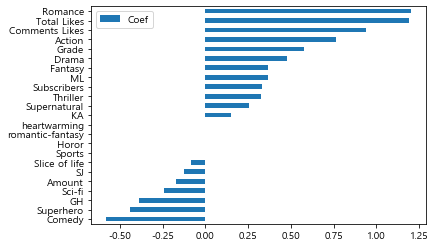

In [6]:
df_LG = pd.DataFrame(model.coef_[0], columns=['Coef'], index= X_test.columns ).sort_values(by='Coef')
df_LG.plot(kind = 'barh')
df_LG.sort_values(by='Coef', ascending = False)

## Confusion Matrix & Performances

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
def confusion_matrix_lan(X_test, y_test,lan1,lan2):
    y_true = list(y_test)
    y_pred = model.predict(X_test)
    confusion_matrix(y_true, y_pred)


    cm = confusion_matrix(y_test, y_pred) 

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                         index = ['상위50%','하위50%'], 
                         columns = ['상위50%','하위50%'])

    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(lan1+ '-> '+lan2 +' \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print( 'Accuracy : {:.3f} \nPrecision : {:.3f} \nRecall : {:.3f} \nF1_score: {:.3f} '.format(accuracy_score(y_test, y_pred),
          precision_score(y_test, y_pred),
          recall_score(y_test, y_pred) ,
          f1_score(y_test, y_pred)  ))

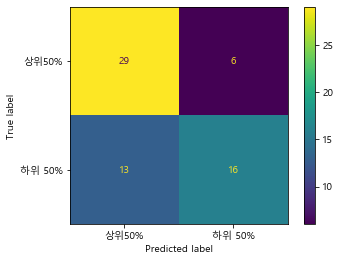

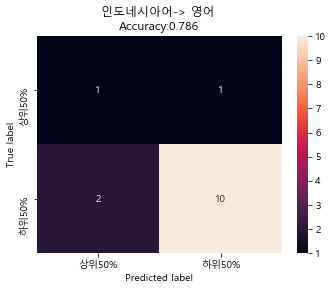

Accuracy : 0.786 
Precision : 0.909 
Recall : 0.833 
F1_score: 0.870 


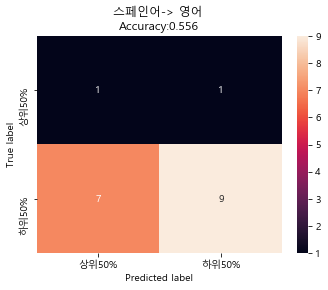

Accuracy : 0.556 
Precision : 0.900 
Recall : 0.562 
F1_score: 0.692 


In [8]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'인도네시아어','영어')
confusion_matrix_lan(X1_test, y1_test,'스페인어','영어')

## KNN 

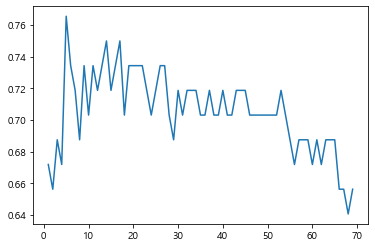

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(X_train, y_train)  
#print('[분류 결과] \n', model.predict(X_test)) 
k = 70
scores = []
for i in range(1,k):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #print('\n [테스트 정확도] :', score)  
    scores.append(score)
# print(model.predict_proba(X_test))
K = scores.index(max(scores))+1
plt.plot([i for i in range(1,k)], scores)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  
# model.predict(xx_test)
knn = model.score(X_test, y_test)



print('\n인도네시아어-> 영어 테스트 정확도 :', model.score(X0_test, y0_test))  
knn_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 영어 테스트 정확도 :', model.score(X1_test, y1_test))  
knn_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0]

 [테스트 정확도] : 0.765625

인도네시아어-> 영어 테스트 정확도 : 0.7857142857142857

스페인어-> 영어 테스트 정확도 : 0.7222222222222222


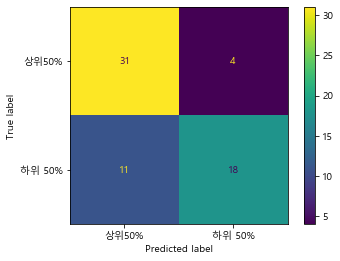

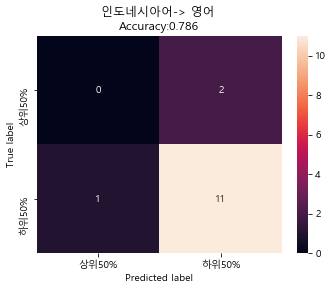

Accuracy : 0.786 
Precision : 0.846 
Recall : 0.917 
F1_score: 0.880 


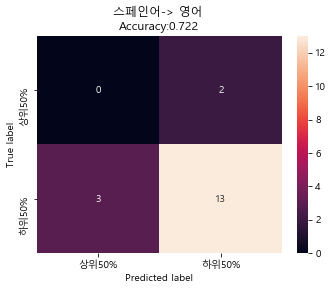

Accuracy : 0.722 
Precision : 0.867 
Recall : 0.812 
F1_score: 0.839 


In [11]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'인도네시아어','영어')
confusion_matrix_lan(X1_test, y1_test,'스페인어','영어')

## RandomForest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  

RF = model.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))


print('\n인도네시아어-> 영어 테스트 정확도 :', model.score(X0_test, y0_test))  
RF_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 영어 테스트 정확도 :', model.score(X1_test, y1_test))  
RF_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0]

 [테스트 정확도] : 0.734375

인도네시아어-> 영어 테스트 정확도 : 0.8571428571428571

스페인어-> 영어 테스트 정확도 : 0.8888888888888888


,Importance
Comments Likes,0.360952
Grade,0.106835
Subscribers,0.104961
Romance,0.100667
Total Likes,0.082900
Amount,0.079378
Sci-fi,0.030850
Comedy,0.025594
SJ,0.025063
Drama,0.015308


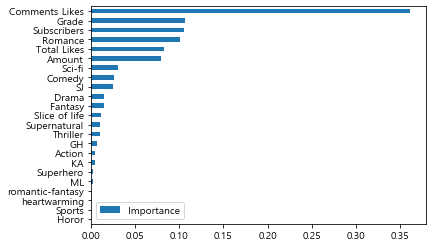

In [13]:
df_RF = pd.DataFrame(model.feature_importances_,
             columns=['Importance'], index = X_test.columns).sort_values(by='Importance')
df_RF.plot(kind='barh' ,sort_columns ='Importance' )
df_RF.sort_values(by='Importance', ascending = False)

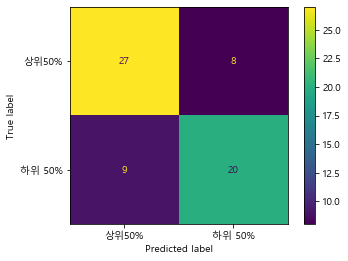

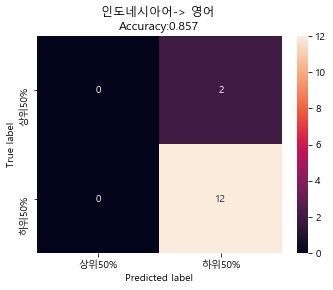

Accuracy : 0.857 
Precision : 0.857 
Recall : 1.000 
F1_score: 0.923 


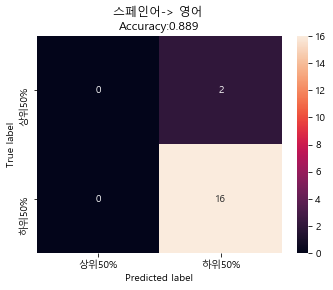

Accuracy : 0.889 
Precision : 0.889 
Recall : 1.000 
F1_score: 0.941 


In [14]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'인도네시아어','영어')
confusion_matrix_lan(X1_test, y1_test,'스페인어','영어')

## SVM - SVC

In [15]:
from sklearn.svm import SVC #Ridge
model = SVC(random_state=42)
 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
SVM= model.score(X_test, y_test)


print('\n인도네시아어-> 영어 테스트 정확도 :', model.score(X0_test, y0_test))  
SVM_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 영어 테스트 정확도 :', model.score(X1_test, y1_test))  
SVM_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0]

 테스트 정확도 : 0.75

인도네시아어-> 영어 테스트 정확도 : 0.7857142857142857

스페인어-> 영어 테스트 정확도 : 0.8333333333333334


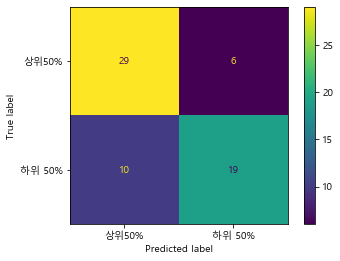

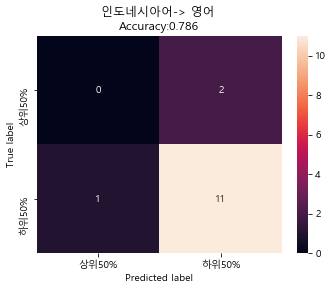

Accuracy : 0.786 
Precision : 0.846 
Recall : 0.917 
F1_score: 0.880 


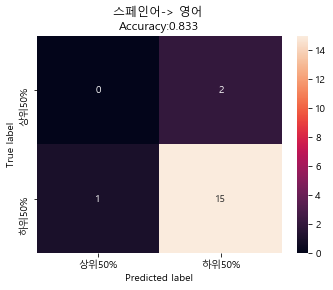

Accuracy : 0.833 
Precision : 0.882 
Recall : 0.938 
F1_score: 0.909 


In [16]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'인도네시아어','영어')
confusion_matrix_lan(X1_test, y1_test,'스페인어','영어')

# Models Evaluation 
## 영어 자체

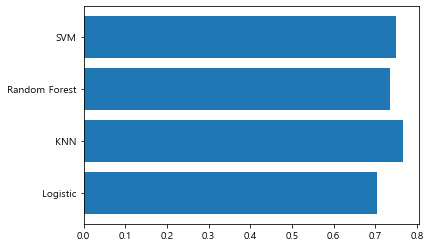

,Accuracy
Logistic,0.703125
KNN,0.765625
Random Forest,0.734375
SVM,0.750000


In [17]:
model_score=[logist,knn,RF, SVM]
models= ['Logistic','KNN','Random Forest','SVM']

plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])

## 인도네시아어 -> 영어

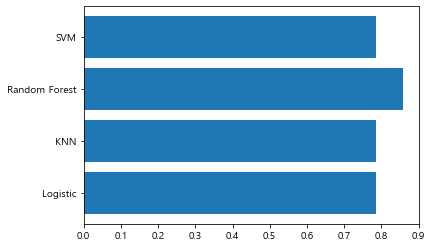

,Accuracy
Logistic,0.785714
KNN,0.785714
Random Forest,0.857143
SVM,0.785714


In [18]:
model_score=[logist_pred0, knn_pred0, RF_pred0, SVM_pred0]
models= ['Logistic','KNN','Random Forest','SVM']
plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])

## 스페인어 ->영어

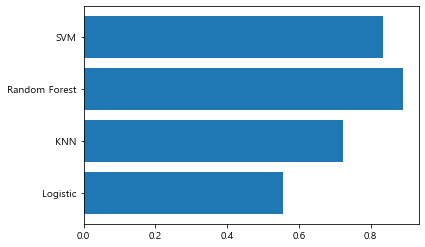

,Accuracy
Logistic,0.555556
KNN,0.722222
Random Forest,0.888889
SVM,0.833333


In [19]:
model_score=[logist_pred1, knn_pred1, RF_pred1, SVM_pred1]
models= ['Logistic','KNN','Random Forest','SVM']
plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])